<h1>Optimization - MALIS project Key Estimation</h1>

Execute this cell to import everything needed

In [28]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from loading_dataset import prepare_panda_dataFrame
import pandas as pd

In [6]:
# Run this to create a csv file of a dataset
dataset_path="./Datasets/giantsteps-key-dataset-master/audio"
key_annotation_path="./Datasets/giantsteps-key-dataset-master/annotations/key"
chroma_df=prepare_panda_dataFrame(dataset_path,key_annotation_path)

loading ./Datasets/giantsteps-key-dataset-master/audio
What transformation would you like to perform on your dataset,
enter 1 for chromagram, 2 for spectrogram:1
1
Processing data, please wait


/home/mirado/anaconda3/lib/python3.8/site-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


Audios have correctly been processed 

Do you want to register data into dataframe ? [yes: enter 1/no: enter 0]:0


-------------------- KFold --------------------

In [29]:
    # Neural network parameters
    epochs = 1000
    iter_for_convergence = epochs
    hidden_layer_sizes = (100,50,30) # these represents the number of neurons IN THE HIDDEN LAYERS ONLYS
    activation = 'logistic'
    validation= True;
    verbose=False;
    learning_rate = 0.008
    
    # Regularization constant
    alpha=0.0

    # NNet init
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, 
                        random_state=1, max_iter=epochs, learning_rate_init=learning_rate, 
                        learning_rate='adaptive', alpha=alpha, early_stopping=validation, 
                        verbose=verbose, n_iter_no_change=iter_for_convergence)

In [30]:
# Preparation of training data
#spectro_gs_df = pd.read_csv("giantsteps_spectro.csv")

X, y = np.stack(chroma_df['chromagram']), np.array(chroma_df['coded_key'].astype('int'))

In [31]:
kfold = KFold(5)
skfold = StratifiedKFold(5)

y_array_kfold = cross_val_score(mlp, X, y, cv=kfold)
y_array_skfold = cross_val_score(mlp, X, y, cv=skfold)

/home/mirado/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mirado/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mirado/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mirado/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mirado/anaconda3/lib/python3.8

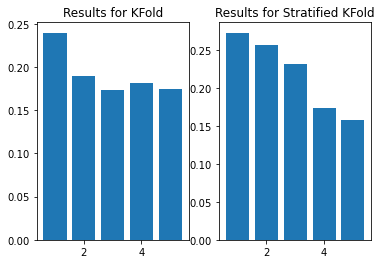

In [38]:
# Ploting the results
x = [i for i in range(1,6)]

for i in range(2):
    plt.subplot(1,2,i+1)
    if i==0:
        plt.bar(x, y_array_kfold)
        plt.title("Results for KFold")
    if i==1: 
        plt.bar(x, y_array_skfold)
        plt.title("Results for Stratified KFold")

-------------------- GRID SEARCH --------------------

In [39]:
# Creating the MLP Classifier and initiating all values for that
epochs = 400
iter_for_convergence = epochs
hidden_layer_sizes = (100,50,30) # these represents the number of neurons IN THE HIDDEN LAYERS ONLYS
activation = 'logistic'
validation= True;
verbose=False;

#mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation=activation,
#                   random_state=1, early_stopping=validation,
#                   verbose=verbose, n_iter_no_change=iter_for_convergence)

parameters_dict = {
    'alpha': [0.0001, 0.05],
    'learning_rate_init': [10**-5, 10**-4, 10**-3, 10**-2]
}

mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, 
                        random_state=1, max_iter=epochs, learning_rate_init=learning_rate, 
                        learning_rate='adaptive', alpha=alpha, early_stopping=validation, 
                        verbose=verbose, n_iter_no_change=iter_for_convergence)

In [40]:
# Performing Gridsearch on the parameters

# n_jobs = number of cores to use (-1 = all available)
# cv = number of splits for cross validation

clf = GridSearchCV(mlp, parameters_dict, n_jobs=-1, cv=1)
clf.fit(X_train, y_train)
#mlp.fit(X_train, y_train)

NameError: name 'X_train' is not defined